# Predicting the quality of Wine using Machine Learning (Linear Regression)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

In [2]:
data = pd.read_csv("WineQT.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
data = data.drop('Id', axis=1)
data.shape

(1143, 12)

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.head().T

,0,1,2,3,4
fixed acidity,7.4000,7.8000,7.800,11.200,7.4000
volatile acidity,0.7000,0.8800,0.760,0.280,0.7000
citric acid,0.0000,0.0000,0.040,0.560,0.0000
residual sugar,1.9000,2.6000,2.300,1.900,1.9000
chlorides,0.0760,0.0980,0.092,0.075,0.0760
free sulfur dioxide,11.0000,25.0000,15.000,17.000,11.0000
total sulfur dioxide,34.0000,67.0000,54.000,60.000,34.0000
density,0.9978,0.9968,0.997,0.998,0.9978
pH,3.5100,3.2000,3.260,3.160,3.5100
sulphates,0.5600,0.6800,0.650,0.580,0.5600


In [7]:
data.shape

(1143, 12)

In [8]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
data["quality"].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

Text(0, 0.5, 'Quality')

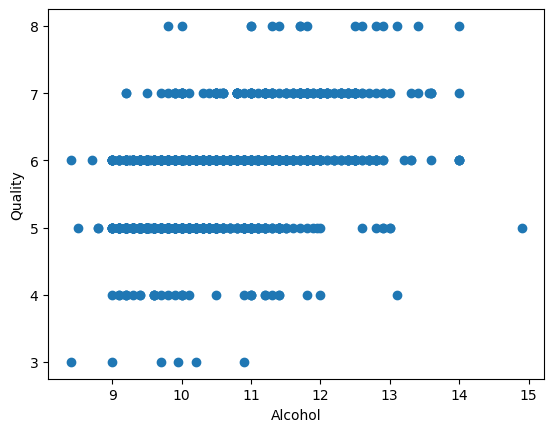

In [10]:
fig, ax = plt.subplots()
ax.scatter(data["alcohol"], data["quality"])
plt.xlabel("Alcohol")
plt.ylabel("Quality")

(array([  6.,   0.,  33.,   0., 483.,   0., 462.,   0., 143.,  16.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

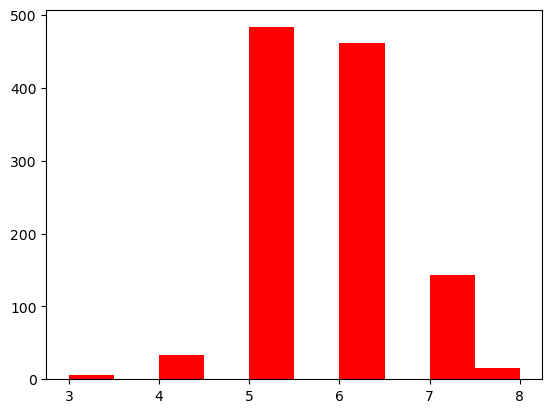

In [11]:
plt.hist(data["quality"], color='r')

C:\Users\CSC\Desktop\wine_quality_prediction\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\CSC\Desktop\wine_quality_prediction\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\CSC\Desktop\wine_quality_prediction\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='quality', ylabel='fixed acidity'>

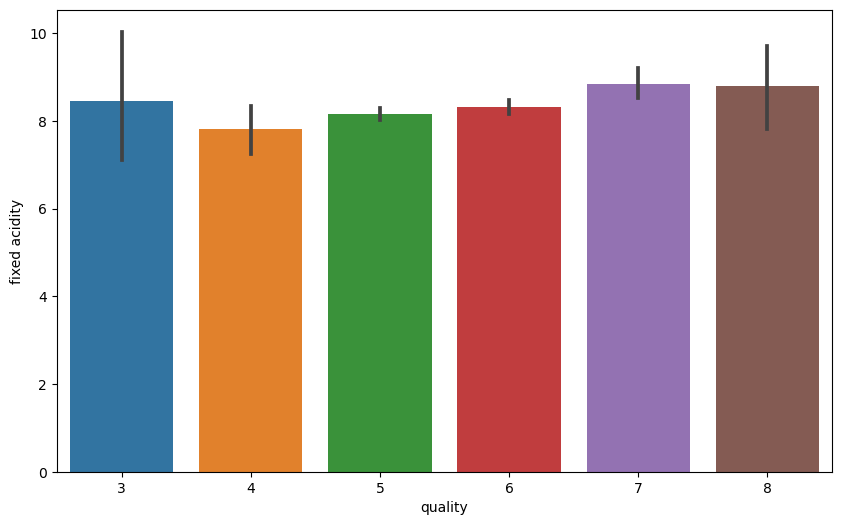

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = data['quality'], y = data['fixed acidity'], data = data)

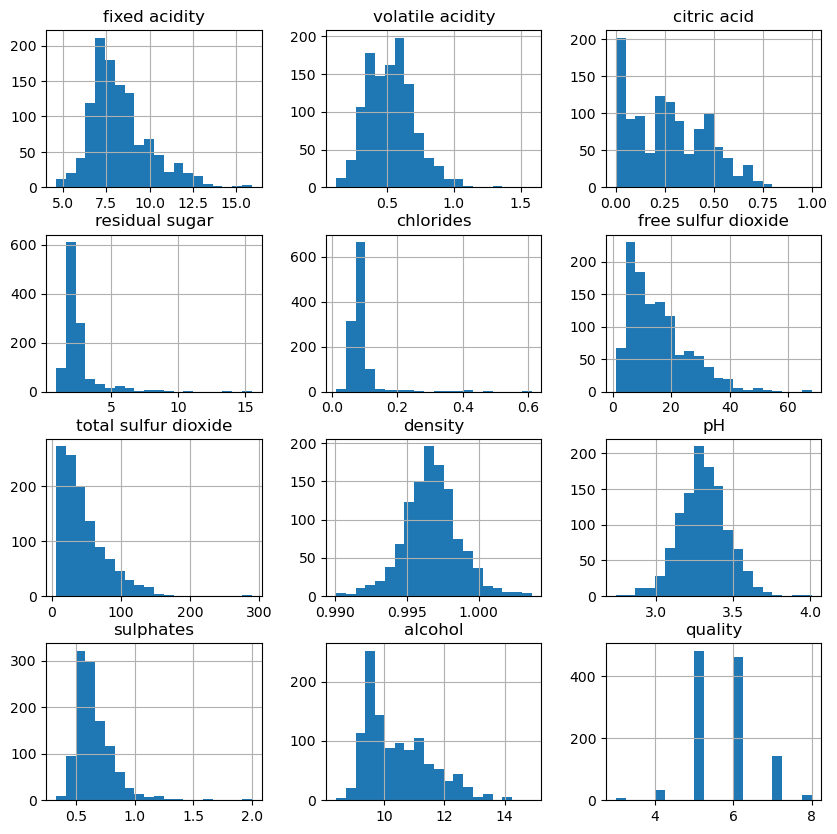

In [13]:
data.hist(bins=20, figsize=(10, 10))
plt.show()

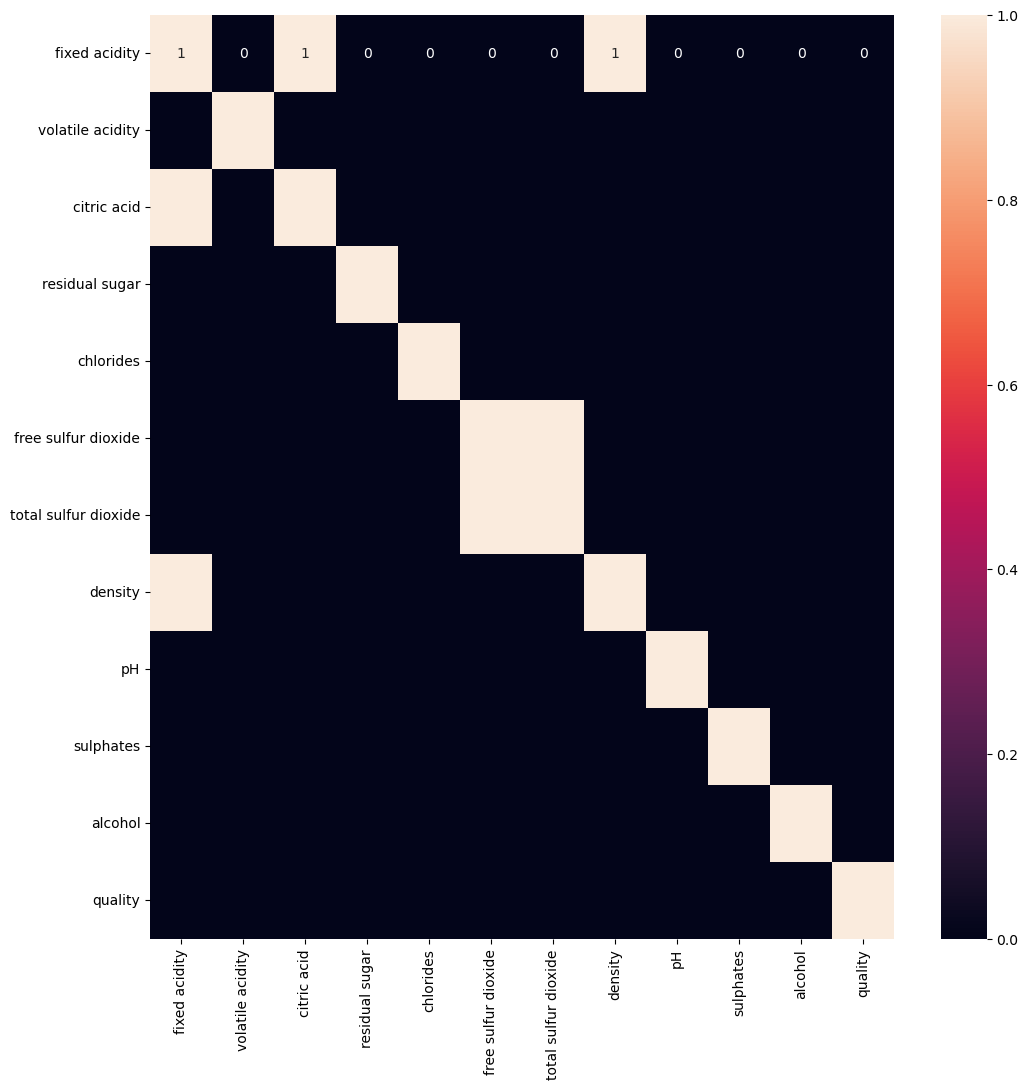

In [14]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr()>0.6, annot=True)
plt.show()

In [15]:
data = data.drop("total sulfur dioxide", axis=1)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6


In [16]:
data.shape

(1143, 11)

In [17]:
X = data.drop("quality", axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2


In [18]:
y = data["quality"]
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((914, 10), (914,), (229, 10), (229,))

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'fit_intercept': [True, False],  
}

In [23]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

In [24]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X_train = norm.fit_transform(X_train)
X_test = norm.transform(X_test)

In [25]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [26]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'fit_intercept': True}


In [27]:
best_model = grid_search.best_estimator_

In [28]:
y_pred = best_model.predict(X_test)
y_pred = np.round(y_pred, 0)
y_pred

array([5., 5., 5., 5., 6., 7., 5., 5., 6., 5., 6., 6., 5., 6., 6., 5., 6.,
       6., 6., 6., 6., 6., 5., 6., 6., 5., 7., 6., 5., 6., 6., 5., 7., 6.,
       6., 5., 5., 6., 7., 7., 6., 5., 7., 5., 5., 5., 6., 6., 5., 6., 6.,
       5., 6., 6., 6., 6., 5., 6., 6., 5., 6., 6., 6., 6., 6., 5., 7., 5.,
       5., 6., 6., 5., 6., 6., 5., 5., 6., 6., 6., 5., 5., 6., 6., 5., 6.,
       6., 5., 6., 6., 5., 5., 5., 5., 5., 5., 5., 5., 7., 6., 6., 6., 6.,
       5., 6., 5., 5., 6., 6., 6., 7., 6., 5., 5., 6., 5., 5., 5., 6., 6.,
       5., 5., 5., 6., 7., 5., 6., 6., 6., 5., 6., 5., 5., 6., 6., 8., 5.,
       4., 5., 6., 6., 7., 5., 6., 5., 6., 5., 5., 5., 5., 5., 7., 5., 6.,
       5., 6., 6., 5., 6., 6., 6., 6., 5., 6., 6., 6., 5., 6., 6., 6., 5.,
       7., 5., 5., 6., 6., 5., 6., 6., 6., 5., 6., 6., 6., 5., 5., 6., 6.,
       5., 6., 6., 6., 6., 7., 6., 6., 5., 5., 6., 7., 6., 6., 6., 5., 5.,
       6., 5., 5., 5., 6., 6., 5., 6., 6., 6., 5., 5., 7., 5., 6., 6., 6.,
       5., 5., 6., 5., 6.

In [29]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.70      0.71        96
           6       0.59      0.70      0.64        99
           7       0.50      0.31      0.38        26
           8       0.00      0.00      0.00         2

    accuracy                           0.63       229
   macro avg       0.36      0.34      0.35       229
weighted avg       0.61      0.63      0.62       229



In [30]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

[[ 0  2  4  0  0]
 [ 1 67 26  1  1]
 [ 0 24 69  6  0]
 [ 0  1 17  8  0]
 [ 0  0  1  1  0]]


In [32]:
print('Training Accuracy:',best_model.score(X_train,y_train))
print('Testing Accuracy:',best_model.score(X_test,y_test))

Training Accuracy: 0.37844676472007166
Testing Accuracy: 0.3007616138387158
